Naloge

In [107]:
import numpy as np
import matplotlib.pyplot as plt 


## Naloga Božiček

In [108]:
H = 6.5
mb = 115
l = 0.9
a = 0.25
g = 9.81
c = 10



#### Hitrost

In [109]:
# m *g * h = 1/2 * m * v^2
# v = sqrt(2 * g * h)
v = np.sqrt(2 * g * H)
print(f'v = {v:.2f} m/s')


v = 11.29 m/s


#### Max zasuk

In [110]:
phi_max = np.arcsin(a/l)
print(f'phi_max = {phi_max:.4f} rad')
print(f'phi_max = {np.rad2deg(phi_max):.4f} deg')


phi_max = 0.2815 rad
phi_max = 16.1276 deg


#### Togost

In [111]:
# 1/2 k phi^2 = 1/2 m v^2 = m * g * (H + a)
# k = m v^2 / phi^2
# k_max = m v^2 / phi_max^2
k_max = 2 * mb * g * (H+a) / phi_max**2
print(f'k_max = {k_max:.2f} N/m')
print(f'k_max = {k_max/100000:.2f} e5 N/m')

k_max = 192222.98 N/m
k_max = 1.92 e5 N/m


#### Nedušena lastna frekvenca

In [112]:
# Gib enačba : Sum M = J * alpha
# J = m * l^2
# Sum M = -kt * phi
# Gib enačba : -kt * phi = m * l^2 * alpha
# mb * l**2 = J
J = mb * l**2
omega0 = np.sqrt(k_max / (J))
print(f'omega = {omega0:.2f} rad/s')

omega = 45.43 rad/s


#### Obhodni čas 

In [113]:
T_0 = 2 * np.pi / omega0
print(f'T_0 = {T_0:.6f} s')

T_0 = 0.138315 s


#### Razmernik dušenja $\delta$

In [114]:
# pravzraprav logaritemski dekrement
# delta = ln(X_1 / X_2)/2* pi * n
# ker nas zanima pri T0/2 je n = 1/2
n = 1/2
# v log lahko namesto v/(c*v) vstavimo samo c
delta  = np.log(c) / (2 * np.pi * n)
print(f'delta = {delta:.4f}')

delta = 0.7329


#### d

In [115]:
# V giblani enačbi je člen d * l/2 * omega (phi odvod) (ker je dušenje pravzaprav na obodni hitrosti, ki se izračunakot omega * l/2)
# d * l/2 * omega => normiramo d * l/2 / J = 2 * delta * omega0
# d * xpika => x = phi * l/2 => xpika = phi pika * l/2
d = 2 * delta * omega0 * J /(l/2)**2
print(f'd = {d:.4f} Ns/m')
print(f'd = {d/10000:.6f} E4 Ns/m')

d = 30631.2603 Ns/m
d = 3.063126 E4 Ns/m


## LNN kolo z dvema vzmetema

In [116]:
m = 2
r = 0.1
k = 1500 # N/m
phi0 = 1.5 # deg
phi0 = np.deg2rad(phi0)
g = 9.81 # m/s^2
b = 0.7

#### J

In [117]:
J = 4*m * r**2 / 2
print(f'J = {J:.4f} kgm^2')

J = 0.0400 kgm^2


#### raztezek vzmeti 2

In [118]:
# ker je kot zelo majhen lahko uporabiš sin ali tan
d2 = np.tan(phi0) * b * r
d2_1 = np.sin(phi0) * b * r
print(f'd2 = {d2*1000:.4f} E-3 m (tan)')
print(f'd2 = {d2_1*1000:.4f} E-3 m (sin)')



d2 = 1.8330 E-3 m (tan)
d2 = 1.8324 E-3 m (sin)


#### $\omega_0$

V mislih moramo imeti, da v gibalni enačbi ne napišemo člena viseče uteži. Ta člen namreč ob nihanju ne spreminja predznaka, zato ga upoštevamo zgolj v vztrajnostnem momentu, saj je to vseeno masa, ki niha.

In [119]:
J_sk = J + m*r**2
# J phi_pikapika + k phi r**2 (1 + b**2) = 0
#  k phi (r* b) -- sila ==> * b*r -- moment
#ko normiramo dobimo:
omega0 = np.sqrt(k*r**2*(1+b**2)/(J_sk))
print(f'omega0 = {omega0:.6f} rad/s')

omega0 = 19.300259 rad/s


## Naloga Masna točka - kroglica na vrvi

In [120]:
m = 0.6 # kg
omega1 = 0.9 # rad/s
R = 0.5 # m
F_0 = 3.9 # N

#### obodna hitrost

In [121]:
v = omega1 * R
print(f'v = {v:.4f} m/s')

v = 0.4500 m/s


#### Vrtilna količina

In [122]:
L1 = m * v * R # = m * R**2 * omega1
print(f'L1 = {L1:.4f} kg m^2/s')

L1 = 0.1350 kg m^2/s


#### x

In [123]:
# centrifugal force
F_c = m * v**2 / R # = m * omega1**2 * R => *R3 *m ==> m2 * R4 * omega2
print(f'F_c = {F_c:.4f} N')
# m * R**2 * omega = 0.135 --> omega = 0.135 / (m * R**2)
r = (L1**2/(m * F_0))**(1/3)
print(f'r = {r:.6f} m')
x = R - r
print(f'x = {x:.6f} m')


F_c = 0.2430 N
r = 0.198221 m
x = 0.301779 m


#### $\omega_2$

In [124]:
# nova kotna hitrost je znana zaradi ohranjanja vrtilne količine
omega2 = L1 / (m * (r)**2)
print(f'omega2 = {omega2:.6f} rad/s')

omega2 = 5.726396 rad/s


## Padanje kamnov

In [136]:
t0 = 0.3 #a
v0 = 10 # m/s
h = 17 # m
g = 9.81 # m/s^2

In [137]:
# malo integriramo in dobimo predpise za pot

#### Čas padanja 1

In [138]:
t1 = np.sqrt(2 * h / g)
print(f't1 = {t1:.6f} s')

t1 = 1.861680 s


#### Čas padanja 2

In [139]:
# solve quadratic equation
# v0 * t + 1/2 * g * t**2 - h = 0
a = 1/2 * g
b = v0
c = -h
t_1 = (-b - np.sqrt(b**2 - 4 * a * c)) / (2 * a)
t_2 = (-b + np.sqrt(b**2 - 4 * a * c)) / (2 * a)
print(f't = {t_1:.6f} s') 
print(f't = {t_2:.6f} s')
t2 = np.max([t_1, t_2])

t = -3.141858 s
t = 1.103122 s


#### Hitrost 2

In [140]:
v2 = v0 + g*t2
print(f'v2 = {v2:.6f} m/s')

v2 = 20.821623 m/s


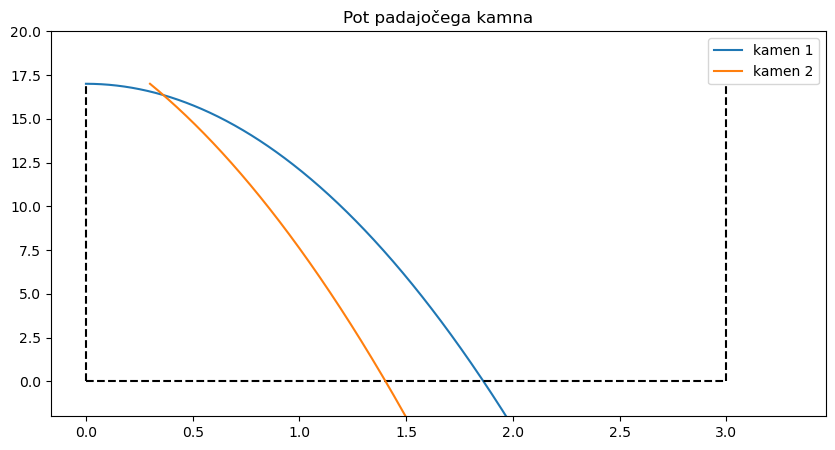

In [145]:
t = np.linspace(0, 3, 1000)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Pot padajočega kamna')
ax.plot(t, -g*t**2/2 + h, label='kamen 1')
ax.hlines(0, 0, max(t), color='k', linestyle='--')
ax.plot(t+t0, -g*t**2/2 -v0*t + h, label='kamen 2')
ax.vlines(3, 0, h, color='k', linestyle='--')
ax.vlines(0, 0, h, color='k', linestyle='--')
ax.set_ylim(-2, 20)
ax.legend();

(0.0, 50.0)

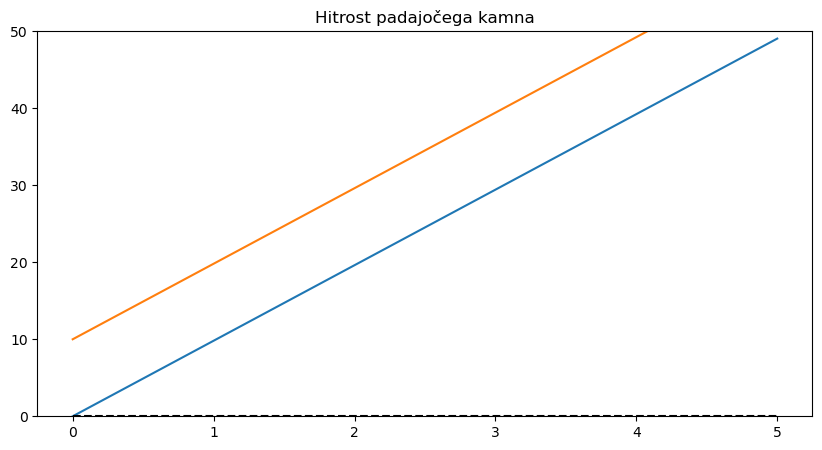

In [142]:
t = np.linspace(0, 5, 1000)

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title('Hitrost padajočega kamna')
ax.plot(t, + g*t, label='kamen 1')
ax.hlines(0, 0, max(t), color='k', linestyle='--')
ax.plot(t, +g*t + v0, label='kamen 2')
ax.set_ylim(0, 50)

## Naloga X

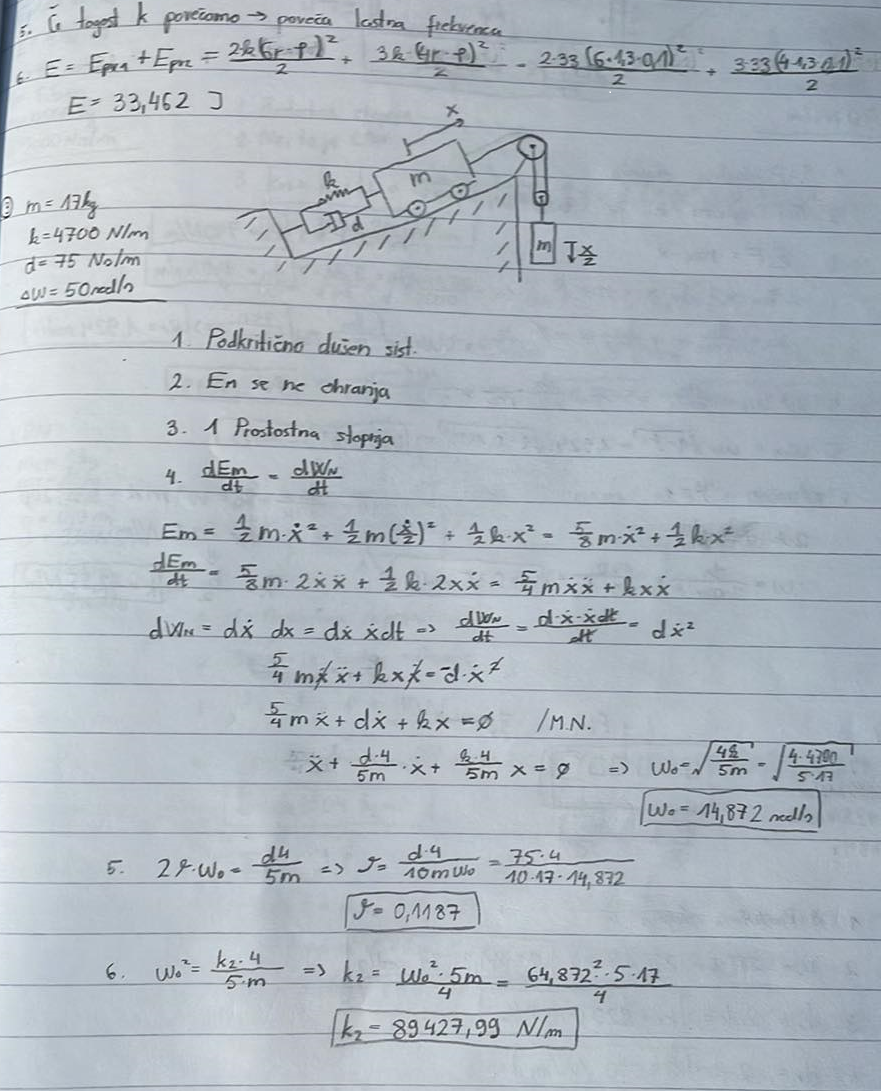

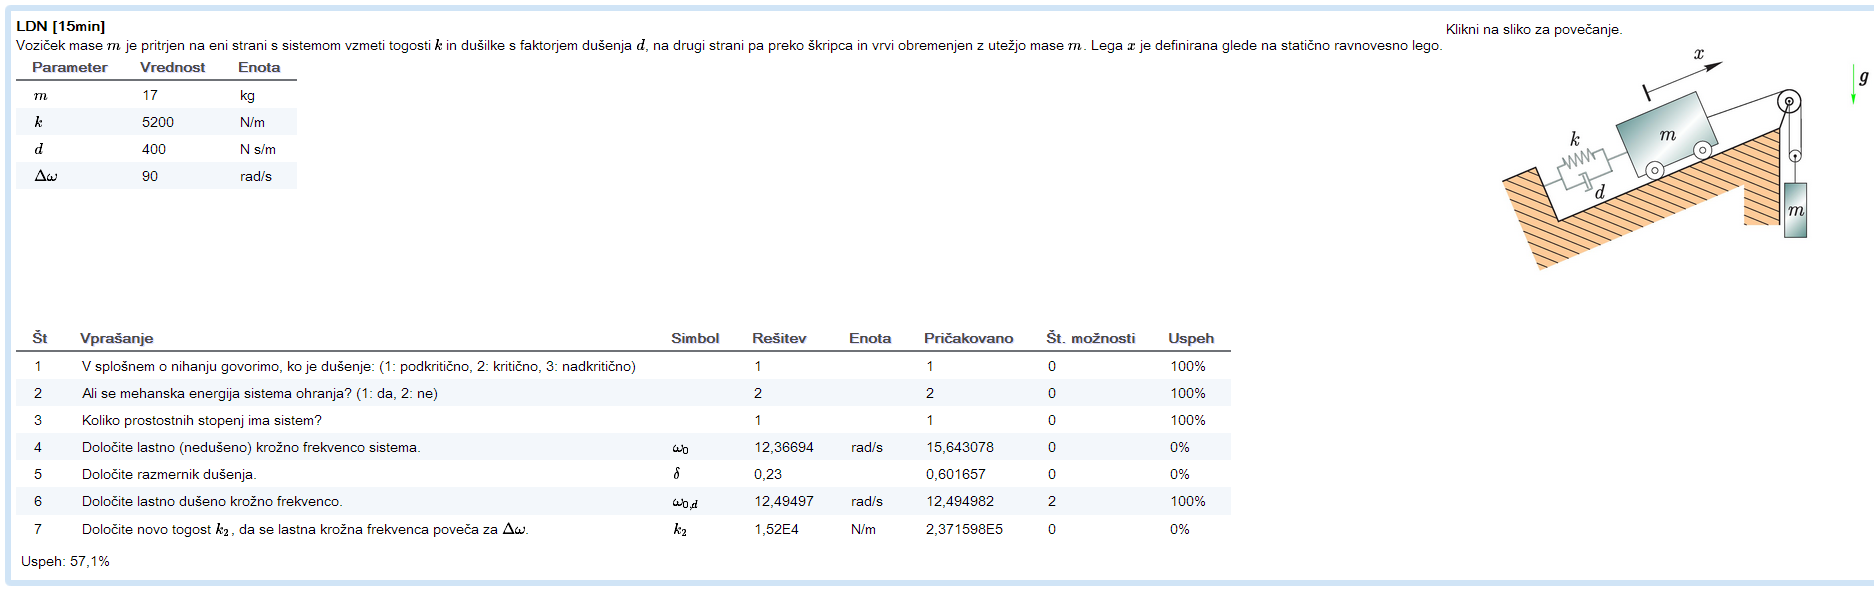

In [132]:
m = 17
k = 5200
d = 400
delta_omega = 40

In [133]:
omega0 = np.sqrt(4*k/(5*m))
omega0

15.643077777500858